# Lab 1, Larry Li, LL2947

In [101]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
data_dir = '../data/data.dat'

In [37]:
#reading in
data = np.loadtxt(data_dir, skiprows=7, delimiter='\t')

In [38]:
distance = data[:, 0]
distance_err = data[:, 1]
velocity = data[:, 2]/1000
original_data = [distance, distance_err, velocity]

### Original plot

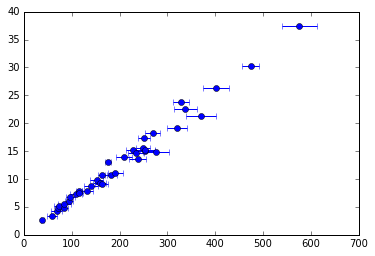

In [5]:
plt.errorbar(distance, velocity, xerr=distance_err, fmt='o')
plt.show()

### Rearranged plot (pt. 2)

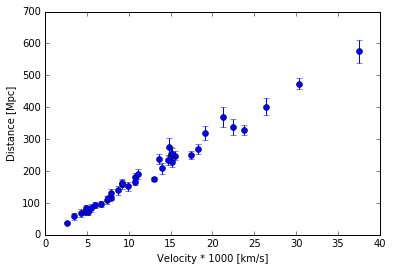

In [6]:
# 2
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.errorbar(velocity, distance, yerr=distance_err, fmt='o')
ax1.set_xlabel('Velocity * 1000 [km/s]')
ax1.set_ylabel('Distance [Mpc]')
plt.show()

### NP polyfit & residual plot (pt. 3)

In [28]:
# 3
poly_coef = np.polyfit(velocity, distance, 1)

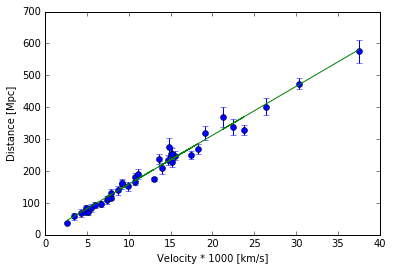

In [29]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.errorbar(velocity, distance, yerr=distance_err, fmt='o')
ax1.plot(velocity, velocity * poly_coef[0] + poly_coef[1])
ax1.set_xlabel('Velocity * 1000 [km/s]')
ax1.set_ylabel('Distance [Mpc]')
plt.show()

In [30]:
residuals = distance - (velocity * poly_coef[0] + poly_coef[1])

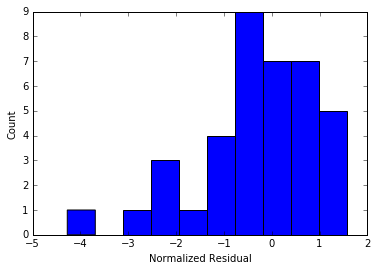

In [140]:
fig3 = plt.figure()
ax1 = fig3.add_subplot(111)
ax1.hist(residuals/distance_err)
ax1.set_xlabel('Normalized Residual')
ax1.set_ylabel('Count')
plt.show()

### Unweighted normal equation (pt. 4)

In [120]:
def create_x_mat(x):
    x_0 = np.power(x, 0)
    big_x = np.mat(np.vstack((x_0, x)))
    return big_x.T
    
def create_y_mat(y):
    return np.mat(y).T
    
def beta_unweighted(x, y):
    x_mat = create_X(x)
    y_mat = create_Y(y)
    return np.array((inv(x_mat.T*x_mat)*x_mat.T*y_mat).T)[0]

In [125]:
print 'FROM numpy polyfit: {}'.format(np.polyfit(velocity, distance, 1)[::-1])
print 'FROM my unweighted normal eq solver: {}'.format(beta_unweighted(velocity, distance))

FROM numpy polyfit: [  5.16280981  15.35262538]
FROM my unweighted normal eq solver: [  5.16280981  15.35262538]


### Data perturbation (pt. 8)

In [129]:
def create_perturbed_data(data, weight):
    perturb = np.random.normal(data, weight)
    return perturb

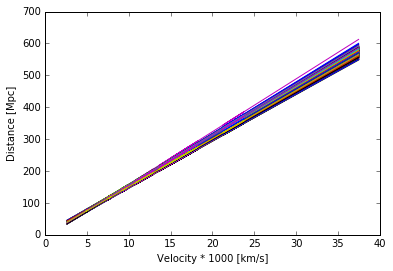

In [141]:
fig8 = plt.figure()
ax1 = fig8.add_subplot(111)

run_num = 1000
gradient = []
for i in range(run_num):
    new_data = create_perturbed_data(distance, distance_err)
    new_fit_coef = np.polyfit(velocity, new_data, 1, w=(1/distance_err))
    
    gradient.append(new_fit_coef[0])

    ax1.plot(velocity, velocity * new_fit_coef[0] + new_fit_coef[1])
    ax1.set_xlabel('Velocity * 1000 [km/s]')
    ax1.set_ylabel('Distance [Mpc]')
plt.show()

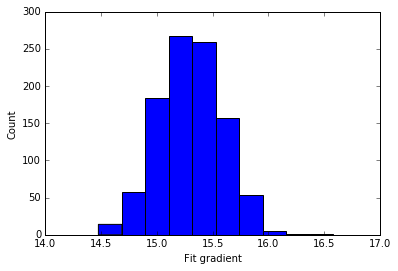

In [142]:
fig8b = plt.figure()
ax1 = fig8b.add_subplot(111)
ax1.hist(gradient)
ax1.set_xlabel('Fit gradient')
ax1.set_ylabel('Count')
plt.show()